In [49]:
# use Summary of weather.csv
"https://www.kaggle.com/code/rtatman/datasets-for-regression-analysis/notebook"

'https://www.kaggle.com/code/rtatman/datasets-for-regression-analysis/notebook'

In [50]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
dataset = pd.read_csv('./datasets/weatherHistory 2.csv')
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [79]:
X = dataset["Temperature (C)"].values
y = dataset["Humidity"].values
X,y

(array([ 9.47222222,  9.35555556,  9.37777778, ..., 22.03888889,
        21.52222222, 20.43888889]),
 array([0.89, 0.86, 0.89, ..., 0.56, 0.6 , 0.61]))

In [53]:
X.ndim, y.ndim

(1, 1)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["mse","mae"]
)
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,callbacks=[callback])

Epoch 1/100


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-07-01 00:51:44.474930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2412/2412 [==============================] - 12s 5ms/step - loss: 24.5158 - mse: 24.5158 - mae: 1.7460
Epoch 2/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1283
Epoch 3/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.1225
Epoch 4/100
2412/2412 [==============================] - 11s 4ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.1232
Epoch 5/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1239
Epoch 6/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1248


In [56]:
model.evaluate(X_test,y_test)

 38/603 [>.............................] - ETA: 2s - loss: 0.0253 - mse: 0.0253 - mae: 0.1271

2022-07-01 00:52:51.262636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - 2s 4ms/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1250


[0.024496551603078842, 0.024496551603078842, 0.12502743303775787]

 88/603 [===>..........................] - ETA: 0s

2022-07-01 00:52:53.758904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - 1s 2ms/step


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


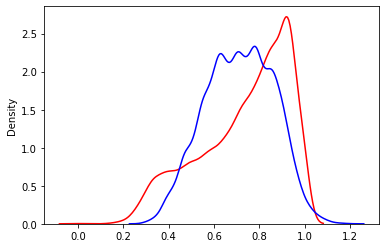

In [57]:
y_pred = model.predict(X_test)
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

## Model 2 with feature scaling

In [94]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline  import make_pipeline


ct = make_column_transformer(
    make_pipeline(StandardScaler(), ["Temperature (C)"])
)

X = dataset[['Temperature (C)']]
y = dataset[["Humidity"]]

X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
print(X.shape,y.shape)

(96453, 1) (96453, 1)


In [95]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])
model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse","mae"]
)
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3)
model2.fit(X_train_normal,y_train, epochs=100,callbacks=[callback])

Epoch 1/100
  21/2412 [..............................] - ETA: 12s - loss: 3.7789 - mse: 3.7789 - mae: 1.5932

2022-07-01 01:11:29.785604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2412/2412 [==============================] - 11s 5ms/step - loss: 0.1703 - mse: 0.1703 - mae: 0.2080
Epoch 2/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1222
Epoch 3/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1223
Epoch 4/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1224
Epoch 5/100
2412/2412 [==============================] - 11s 5ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1224


In [96]:
model2.evaluate(X_test_normal,y_test)

 41/603 [=>............................] - ETA: 2s - loss: 0.0248 - mse: 0.0248 - mae: 0.1250

2022-07-01 01:12:32.829058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - 2s 4ms/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1230


[0.024102626368403435, 0.024102626368403435, 0.12298831343650818]

 86/603 [===>..........................] - ETA: 0s

2022-07-01 01:12:36.687565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


603/603 [==============================] - 1s 2ms/step


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


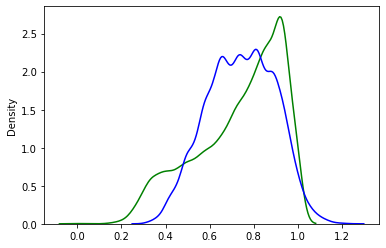

In [97]:
y_pred = model2.predict(X_test_normal)
ax1 = sns.distplot(y_test, hist=False, color="g", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

In [98]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.37189746409356583

In [104]:
test_pred = model2.predict([7])
test_pred

ValueError: in user code:

    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "sequential_10" (type Sequential).
    
    Cannot iterate over a shape with unknown rank.
    
    Call arguments received by layer "sequential_10" (type Sequential):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • training=False
      • mask=None


<tf.Tensor: shape=(1,), dtype=int32, numpy=array([20], dtype=int32)>